In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LR(A, b):  # (n, d), (n, 1)
    return np.linalg.lstsq(A, b)[0]  # (d, 1)

In [3]:
def ODR(A, b):  # (n, d), (n, 1)
    Z = np.block([A, b])  # (n, d + 1)
    U, S, Vh = np.linalg.svd(Z)  # (n, n), (min(n, d + 1), ), (d + 1, d + 1)
    return Vh[0].reshape(-1, 1)  # (d + 1, 1)

In [14]:
def TLS(A, b): # (n, d), (n, 1)
    Z = np.block([A, b])  # (n, d + 1)
    U, S, Vh = np.linalg.svd(Z)  # (n, n), (min(n, d + 1), ), (d + 1, d + 1)
    Ay_tilde = U.T[0].reshape(-1,1) @ np.array(S[0]).reshape(1,1) @ Vh[0].reshape(1,-1) # (n, d+1)
    print("A tilde: {}".format(Ay_tilde[:,0]))
    print("y tilde: {}".format(Ay_tilde[:,1]))
    print("x: {}".format(Vh[1][0] / (Vh[1][1] / -1)))
    return np.array(Vh[1][0] / (Vh[1][1] / -1)).reshape(1,1) 

In [24]:
def plot_LR(A, b, swapaxis=False):
    n, d = A.shape
    assert b.shape[0] == n
    assert d == 1
    
    if not swapaxis:
        plt.xlabel("$a$")
        plt.ylabel("$b$")
    else:
        plt.xlabel("$b$")
        plt.ylabel("$a$")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    
    plt.title("Linear Regression residual plot")
    
    w = LR(A, b)
    
    plt.scatter(A, b, c="blue")
    plt.axline((0, 0), np.block([[1.0, w]])[0], label="$x_{\mathrm{LR}}^{\star}$", c="green")
    
    for i in range(n):
        plt.plot([A[i], A[i]], [b[i], A[i] @ w], c="green")
            
    plt.legend()
    
    
def plot_ODR(A, b, swapaxis=False):
    n, d = A.shape
    assert b.shape[0] == n
    assert d == 1
    
    if not swapaxis:
        plt.xlabel("$a$")
        plt.ylabel("$b$")
    else:
        plt.xlabel("$b$")
        plt.ylabel("$a$")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    
    plt.title("Orthogonal Distance Regression residual plot")
    
    w = ODR(A, b)
    
    plt.scatter(A, b, c="blue")
    plt.axline((0, 0), w[:, 0], label="$x_{\mathrm{ODR}}^{\star}$", c="green")
    
    for i in range(n):
        zi = np.block([A[i], b[i]]).reshape(-1, 1)
        proj_w_zi = (w.T @ zi) * w
        plt.plot([A[i], proj_w_zi[0]], [b[i], proj_w_zi[1]], c="green")
        
    plt.legend()
    
    
def plot_LR_swapped_arguments(A, b):
    n, d = A.shape
    assert b.shape[0] == n
    assert d == 1
    
    plt.xlabel("$a$")
    plt.ylabel("$b$")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    
    plt.title("Linear Regression residual plot: comparison with swapped $A$ and $b$")
    
    w = LR(A, b)
    
    plt.scatter(A, b, c="blue")
    plt.axline((0, 0), np.block([[1.0, w]])[0], label="$x_{\mathrm{LR}}^{\star}$", c="green")
    
    for i in range(n):
        plt.plot([A[i], A[i]], [b[i], A[i] @ w], c="green")
    
    w_swap = LR(b, A)
    
    plt.axline((0, 0), np.block([[w_swap, 1.0]])[0], label="$x_{\mathrm{LR}}^{\star}$, swapped $A$ and $b$", c="orange")
    
    for i in range(n):
        plt.plot([A[i], b[i] @ w_swap], [b[i], b[i]], c="orange")
        
    plt.legend()
    
def plot_LR_ODR(A, b):
    n, d = A.shape
    assert b.shape[0] == n
    assert d == 1
    
    plt.xlabel("$a$")
    plt.ylabel("$b$")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    
    plt.title("Residual plot: comparison between LR and ODR")
    
    w_LR = LR(A, b)
    
    plt.scatter(A, b, c="blue")
    plt.axline((0, 0), np.block([[1.0, w_LR]])[0], label="$x_{\mathrm{LR}}^{\star}$", c="green")
    
    for i in range(n):
        plt.plot([A[i], A[i]], [b[i], A[i] @ w_LR], c="green")
    
    w_ODR = ODR(A, b)
    
    plt.axline((0, 0), w_ODR[:, 0], label="$x_{\mathrm{ODR}}^{\star}$", c="orange")
    
    for i in range(n):
        zi = np.block([A[i], b[i]]).reshape(-1, 1)
        proj_w_zi = (w_ODR.T @ zi) * w_ODR
        plt.plot([A[i], proj_w_zi[0]], [b[i], proj_w_zi[1]], c="orange")
        
    plt.legend()
    
def plot_LR_ODR_TLS(A, b):
    n, d = A.shape
    assert b.shape[0] == n
    assert d == 1
    
    plt.xlabel("$a$")
    plt.ylabel("$b$")
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    
    plt.title("Residual plot: comparison between LR and ODR")
    
    w_LR = LR(A, b)
    
    plt.scatter(A, b, c="blue")
    plt.axline((0, 0), np.block([[1.0, w_LR]])[0], label="$x_{\mathrm{LR}}^{\star}$", c="green")
    
    for i in range(n):
        plt.plot([A[i], A[i]], [b[i], A[i] @ w_LR], c="green")
    
    w_ODR = ODR(A, b)
    
    plt.axline((0, 0), w_ODR[:, 0], label="$x_{\mathrm{ODR}}^{\star}$", c="orange")
    
    for i in range(n):
        zi = np.block([A[i], b[i]]).reshape(-1, 1)
        proj_w_zi = (w_ODR.T @ zi) * w_ODR
        plt.plot([A[i], proj_w_zi[0]], [b[i], proj_w_zi[1]], c="orange")
        
    w_TLS = TLS(A, b)
    
    plt.axline((0, 0), np.block([[1.0, w_TLS]])[0], label="$x_{\mathrm{TLS}}^{\star}$", c="red")
        
    plt.legend()

In [25]:
A = np.array([[-1, 0, 1]]).T
b = np.array([[-1, -1, 2]]).T

# Part (b)

<ipython-input-2-24c50b4c469a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]  # (d, 1)


[[1.5]]


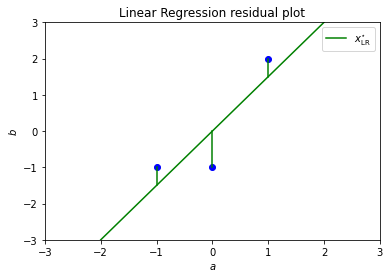

In [26]:
print(LR(A, b))
plot_LR(A, b)

# Part (c)

[[0.5]]


<ipython-input-2-24c50b4c469a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]  # (d, 1)


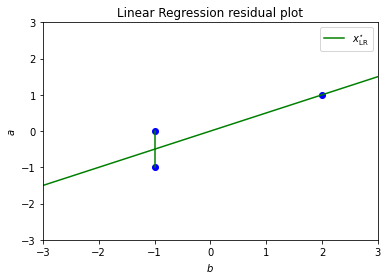

In [27]:
print(LR(b, A))
plot_LR(b, A, swapaxis=True)

# Part (d)

None


<ipython-input-2-24c50b4c469a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]  # (d, 1)


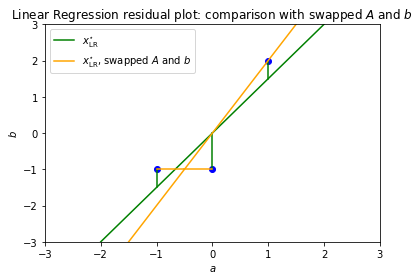

In [28]:
print(plot_LR_swapped_arguments(A, b))

# Part (f)

[[0.47185793]
 [0.8816746 ]]


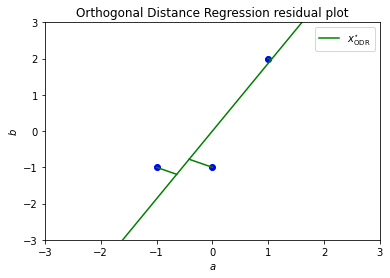

In [29]:
print(ODR(A, b))
plot_ODR(A, b)

[[0.8816746 ]
 [0.47185793]]


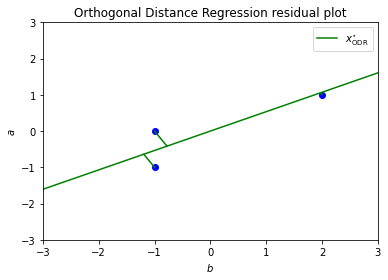

In [30]:
print(ODR(b, A)) 
# note that a-axis is second coordinate and b-axis is first coordinate if inputs are swapped, 
# so this output is the same as above
plot_ODR(b, A, swapaxis=True)

# Part (g)

Though this graph is not required to write about, it might be helpful in forming your response.

<ipython-input-2-24c50b4c469a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]  # (d, 1)


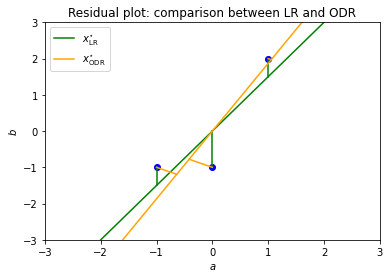

In [31]:
plot_LR_ODR(A, b)

# Part (h)

<ipython-input-2-24c50b4c469a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]  # (d, 1)


A tilde: [-0.63867505 -0.41602515  1.0547002 ]
y tilde: [-1.19337525 -0.7773501   1.97072534]
x: 1.8685170918213292


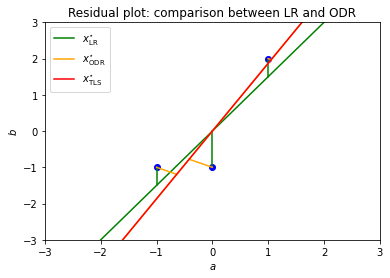

In [32]:
plot_LR_ODR_TLS(A, b)